In [34]:
import tensorflow
from tensorflow import keras
import cv2
import os
import pandas as pd
import numpy as np 
import re
import itertools
import random
import warnings
import matplotlib.pyplot as plt

In [35]:
physical_devices = tensorflow.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
warnings.filterwarnings('ignore')

Num GPUs Available:  1


In [36]:
def imshow(classe,name):
    import warnings
    with warnings.catch_warnings():
        import matplotlib.image as mpimg
        img = mpimg.imread("C:/Users/Administrator/Desktop/asl_alphabet_train/asl_alphabet_train/"+classe+"/"+name+".jpg")
        img2 = cv2.imread("C:/Users/Administrator/Desktop/asl_alphabet_train/asl_alphabet_train/"+classe+"/"+name+".jpg")
        print(type(img2))
        print(img2)
        imgplot = plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title("image correspond à lettre: "+classe)
    return imgplot

<class 'numpy.ndarray'>
[[[252   2   1]
  [248   0   1]
  [249   0  10]
  ...
  [248   0   4]
  [252   4   3]
  [246   0   0]]

 [[249   1   1]
  [234   1   3]
  [209   6  15]
  ...
  [198   6  17]
  [210   2   4]
  [227  11   6]]

 [[241   0   0]
  [206   8  10]
  [144  32  39]
  ...
  [244 173 189]
  [255 165 174]
  [164   7  11]]

 ...

 [[254   3   5]
  [195   3   3]
  [213 135 129]
  ...
  [158 129 144]
  [224 125 135]
  [144   9  17]]

 [[251   0   0]
  [219   8   4]
  [255 124 120]
  ...
  [225 126 136]
  [253 114 118]
  [172  13  15]]

 [[251   1   0]
  [227   6   2]
  [173  10   7]
  ...
  [146  11  19]
  [172  13  17]
  [179   7   7]]]


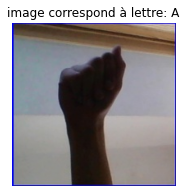

In [37]:
imshow("A","A1")

# Data Preparation

In [38]:
def target_identifier():
    direc = "C:/Users/Administrator/Desktop/asl_alphabet_train/asl_alphabet_train"
    classes=[file for file in  os.listdir(direc)]
    all_files=[]
    for c in classes:
         all_files.append([[f, cv2.resize(cv2.imread(direc+'/'+c+'/'+f), (100,100)) ,classes.index(c)] for f in os.listdir(direc+'/'+c)])
    all_files = all_files
    return all_files,[[c, classes.index(c)] for c  in classes]

classed_data,classes = target_identifier()
classed_data[0]

[['A1.jpg',
  array([[[246,   1,   2],
          [224,   3,  11],
          [220,   5,   4],
          ...,
          [214,   5,   6],
          [220,   3,  11],
          [234,   4,   3]],
  
         [[219,   4,   5],
          [100,  39,  46],
          [ 71,  46,  53],
          ...,
          [202, 179, 194],
          [203, 179, 197],
          [202,  88,  97]],
  
         [[214,   5,   4],
          [ 71,  47,  54],
          [ 33,  51,  65],
          ...,
          [164, 175, 192],
          [158, 176, 197],
          [180,  90, 101]],
  
         ...,
  
         [[217,   6,   1],
          [172, 136, 129],
          [145, 138, 135],
          ...,
          [131, 140, 141],
          [133, 134, 146],
          [178,  69,  76]],
  
         [[222,   4,   5],
          [170, 136, 130],
          [136, 142, 137],
          ...,
          [133, 135, 144],
          [132, 134, 148],
          [177,  67,  77]],
  
         [[237,   4,   2],
          [199,  70,  67],
          [1

In [39]:
classes_2 = [classes[i][0] for i in range(len(classes))]
classed_data_flat =[]
for a in classed_data:
    for b in a :
        classed_data_flat.append(b)

print(classed_data_flat[0][0])
random.shuffle(classed_data_flat)
print(classed_data_flat[0][0])


A1.jpg
W457.jpg


In [40]:
def to_np_array(list1):
    img_data = []
    img_labels = []
    for i in range(len(list1)):
        img_data.append(list1[i][1])
        img_labels.append(list1[i][2])
    img_data = np.array(img_data)
    img_labels = np.array(img_labels)
    return img_data, img_labels

In [41]:
X_train, Y_train  = to_np_array(classed_data_flat)

# Deep learning model

In [42]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

import sklearn.model_selection as model_selection
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [43]:
train_data, val_data, train_labels, val_labels = model_selection.train_test_split(X_train, Y_train, test_size=0.20)

In [44]:
print(len(train_data), " ", len(train_labels), len(val_data), " ", len(val_labels))


69600   69600 17400   17400


In [45]:
train_data.shape

(69600, 100, 100, 3)

In [46]:
train_data.shape[1:]

(100, 100, 3)

In [47]:
def build_model(classes):
    model = keras.Sequential([
            layers.InputLayer(input_shape=train_data.shape[1:]),
            
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
        
            layers.Flatten(),
        
            layers.Dense(1024, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(len(classes), activation="softmax")
    ])
    return model
    

In [48]:
model = build_model(classes_2)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [49]:
# Compiling model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Early stopping 
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, min_delta = 0.01, mode = "min" )
# Training model
history = model.fit(train_data, train_labels, epochs=100, validation_data=(val_data, val_labels)  , callbacks=[callback], batch_size=64)



Epoch 1/100
1088/1088 [==============================] - 105s 96ms/step - loss: 1.2688 - accuracy: 0.7537 - val_loss: 0.1408 - val_accuracy: 0.9524
Epoch 2/100
1088/1088 [==============================] - 107s 98ms/step - loss: 0.1382 - accuracy: 0.9560 - val_loss: 0.0608 - val_accuracy: 0.9814
Epoch 3/100
1088/1088 [==============================] - 116s 107ms/step - loss: 0.0988 - accuracy: 0.9691 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 4/100
1088/1088 [==============================] - 127s 117ms/step - loss: 0.0862 - accuracy: 0.9742 - val_loss: 0.0575 - val_accuracy: 0.9799
Epoch 5/100
1088/1088 [==============================] - 210s 193ms/step - loss: 0.0725 - accuracy: 0.9788 - val_loss: 0.0446 - val_accuracy: 0.9871
Epoch 6/100
1088/1088 [==============================] - 122s 112ms/step - loss: 0.0755 - accuracy: 0.9792 - val_loss: 0.0389 - val_accuracy: 0.9880


In [32]:
def accuracy_plot(history):
    plt.figure(figsize=(10, 6))    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.ylim(ymin=0 , ymax=1)
    plt.show()
    
    plt.figure(figsize=(10, 6))    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

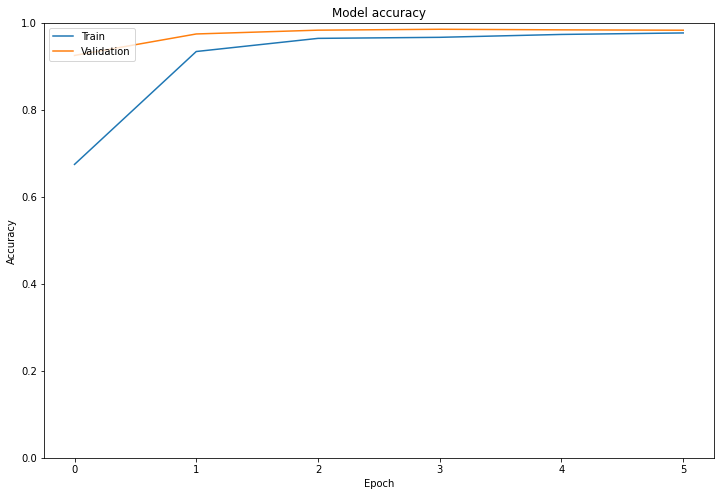

<Figure size 1080x648 with 0 Axes>

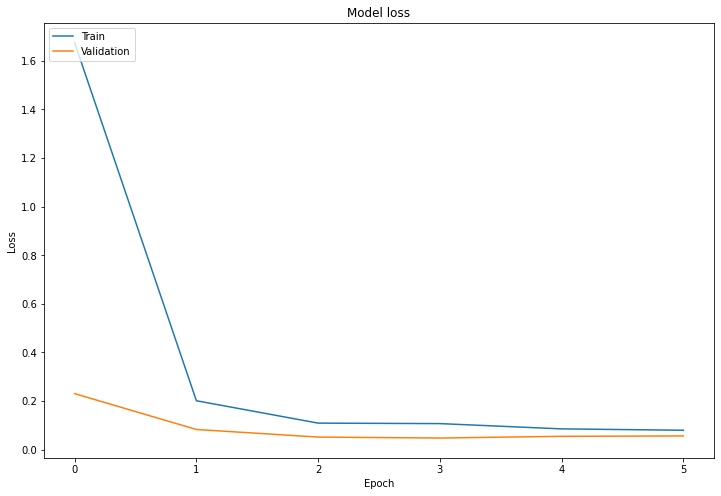

<Figure size 1080x648 with 0 Axes>

In [33]:
accuracy_plot(history)

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams["figure.figsize"] = (20,3)

In [51]:
def test_data_maker(cl):
    test_direc = "C:/Users/Administrator/Desktop/asl_alphabet_test/asl_alphabet_test"
    files = [f for f in os.listdir(test_direc)]
    names = [re.sub("_test.jpg", '', b) for b in files]
    classy = [cl[i] for i in range(len(cl))]
    labels = [classy.index(a) for a in names]
    images = [cv2.resize(cv2.imread(test_direc+'/'+f) ,(100,100))for f in files ]    
    return [[files[i],images[i],labels[i]] for i in range(len(files))]


In [21]:
classes_2 = [classes[i][0] for i in range(len(classes))]
a = test_data_maker(classes_2)
X_test,Y_test= to_np_array(a)


In [22]:
X_test.shape

(29, 100, 100, 3)

In [23]:
pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

cm = confusion_matrix(Y_test,pred_y)


Confusion matrix, without normalization


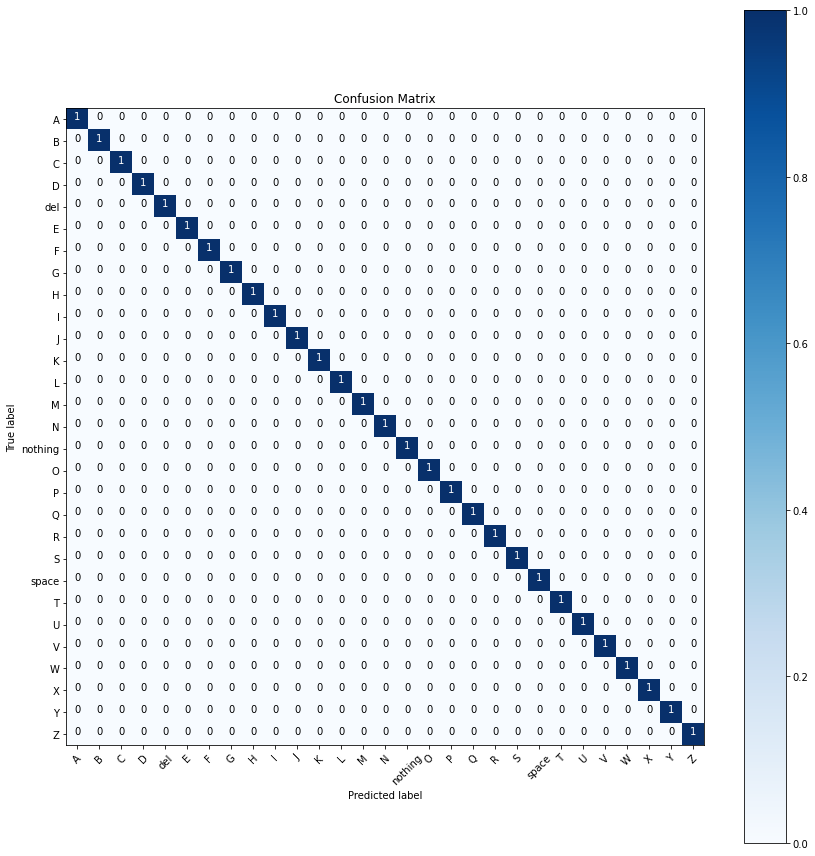

In [24]:
plot_confusion_matrix(cm=cm, classes=classes_2, title='Confusion Matrix')


In [25]:
def imshow_(img):
    import warnings
    with warnings.catch_warnings():
        import matplotlib.image as mpimg
        img = mpimg.imread("C:/Users/Administrator/Desktop/Alzheimer_s Dataset/test/"+name+".jpg")
        img = cv2.resize(200,200)
        imgplot = plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title(str(proba*100)+'% is '+ stade)
    return imgplot

In [26]:
def predictor(name,classes,model):
    direct = "C:/Users/Administrator/Desktop/test_2/"
    img = cv2.imread(direct+name+".jpg")
    img = cv2.resize(img, (100,100))
    img=np.array(img)
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    values= []
    for x in pred:
        for b in x:
            values.append(b)
    proba = round(float(max(values)),4)*100
    print(str("Your Prediction is--- "+classes_2[values.index(max(values))]+" ---with probablity: "+str(proba)+"%"), classes_2[values.index(max(values))])
    return str("Your Prediction is--- "+classes_2[values.index(max(values))]+" ---with probablity: "+str(proba)+"%"), classes_2[values.index(max(values))],im_show(name)


def im_show(name):
    import warnings
    plt.figure(figsize=(10, 10))
    with warnings.catch_warnings():
        import matplotlib.image as mpimg
        img = mpimg.imread("C:/Users/Administrator/Desktop/test_2/"+name+".jpg")
        imgplot = plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title("The letter is: "+name)
    return imgplot

In [27]:
def test_names():
    c =  [a for a in os.listdir("C:/Users/Administrator/Desktop/test_2")]
    return [b[0]  for b in c]
test_2= test_names()
test_2

['Q', 'W', 'X']

Your Prediction is--- W ---with probablity: 100.0% W


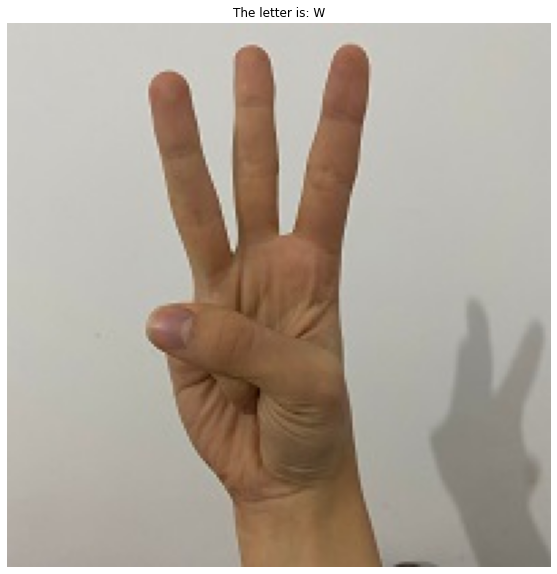

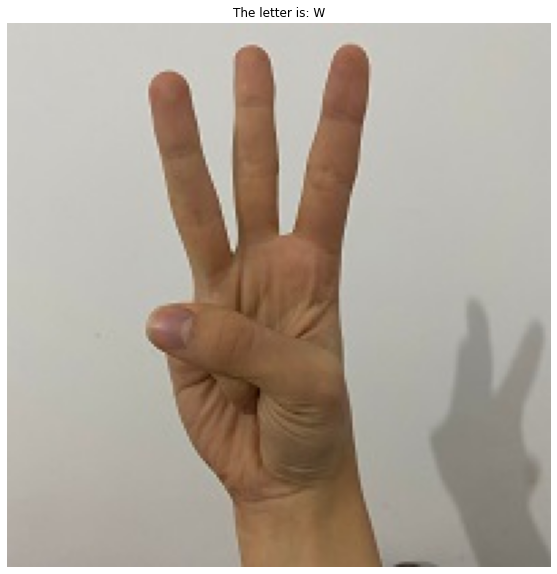

In [52]:
predictor("W",classes_2,model)
im_show("W")



Your Prediction is--- Q ---with probablity: 100.0% Q


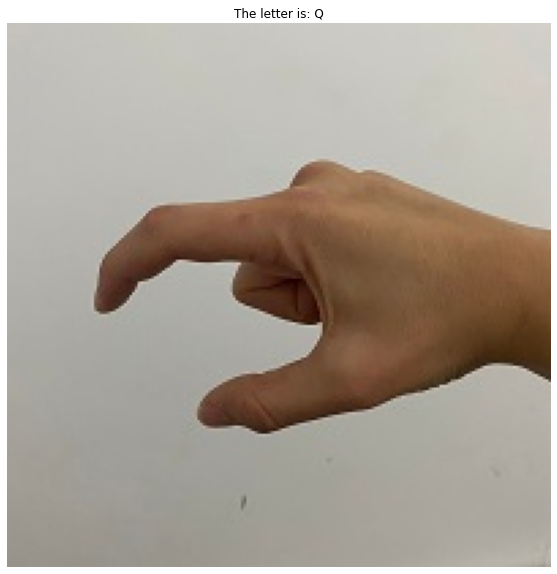

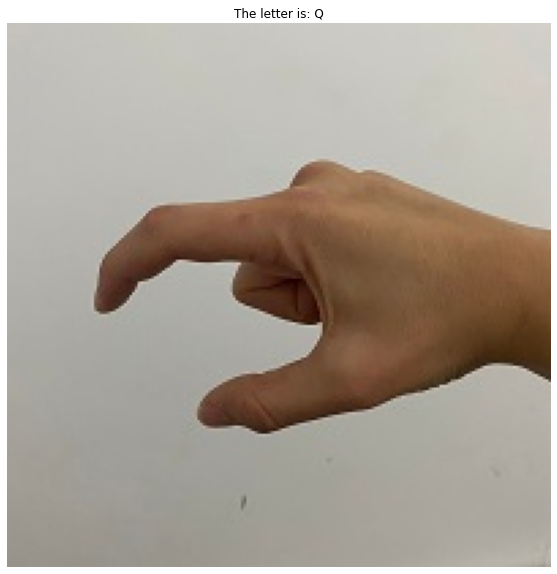

In [53]:
predictor("Q",classes_2,model)
im_show("Q")


Your Prediction is--- R ---with probablity: 100.0% R


('Your Prediction is--- R ---with probablity: 100.0%',
 'R',
 <matplotlib.image.AxesImage at 0x2667fa1b1f0>)

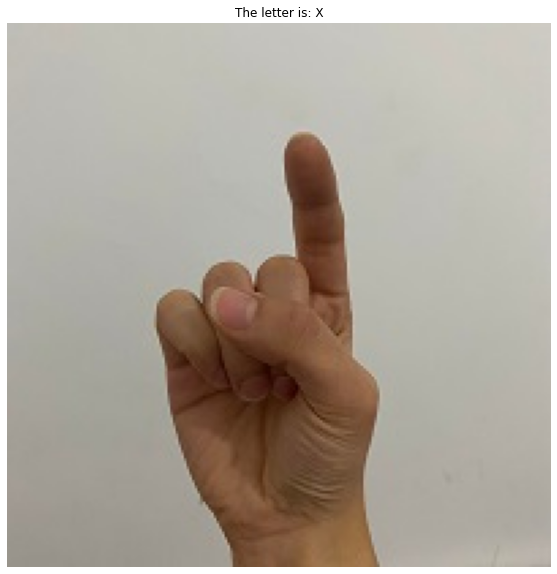

In [54]:
predictor("X",classes_2,model)


In [55]:
def x_tain_stat(train_labels):
    li=list(train_labels)
    el = list(set(train_labels))
    vals =  [li.count(a) for a in el]
    height = [3, 12, 5, 18, 45]
    plt.bar(el, vals)
    plt.show()


# pre Trained model:  InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3,MobileNet, InceptionResNetV2, ResNet50, VGG19
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False)
base_model.summary()

In [ ]:
from tensorflow.keras.applications import InceptionV3, MobileNet,InceptionResNetV2, DenseNet201,VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [ ]:
model_3 = keras.Sequential()
model.add(InceptionV3(weights="imagenet",input_shape=(100,100,3),include_top=False))
model_3.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model_3.add(layers.Dropout(0.3))
model_3.add(layers.Dense(len(classes_2),activation="softmax"))

model_3.summary()

In [ ]:
# Compiling model
opt = keras.optimizers.Adam(learning_rate=0.001)
pretrained_model3.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Early stopping 
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, min_delta = 0.01, mode = "min" )
# Training model
#history = model.fit(train_data, train_labels, epochs=100, validation_data=(val_data, val_labels)  , callbacks=[callback], batch_size=64)
history2 = pretrained_model3.fit(train_data, train_labels, epochs=100, validation_data=(val_data, val_labels)  , batch_size=128)


In [ ]:
accuracy_plot(history2)

In [ ]:
pred2 = model.predict(X_test)
pred_y2 = pred.argmax(axis=-1)

cm2 = confusion_matrix(Y_test,pred_y2)

In [ ]:
plot_confusion_matrix(cm=cm2, classes=classes_2, title='Confusion Matrix')


In [ ]:
predictor("W",classes_2,model)
im_show("W")


In [ ]:
!pip install numba